In [4]:
import numpy as np
import dedalus.public as d3
import logging
from numpy import pi
import numpy as np
import xarray as xr
from init_tools import *
import matplotlib.pyplot as plt
logger = logging.getLogger(__name__)
import h5py
import scipy.io as spio
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Parameters
Lx, Ly = 2*pi, 2*pi
Nx, Ny = 256, 256
Re_hyp = 4e13
Re = 4e3
dealias = 3/2
Ro = 0.4
Fr = 0.3
wave_amp = 0.5
kw=1
lw = 0

# Timestep params
timestepper = d3.RK222
T = 50
timestep = 1e-3
dtype = np.float64


# Bases
coords = d3.CartesianCoordinates('x', 'y')
dist = d3.Distributor(coords, dtype=dtype)
xbasis = d3.RealFourier(coords['x'], size=Nx, bounds=(0, Lx), dealias=dealias)
ybasis = d3.RealFourier(coords['y'], size=Ny, bounds=(0, Ly), dealias=dealias)

x, y = dist.local_grids(xbasis, ybasis)
xx, yy = x+0*y, y+0*x

# Define operators
dt = d3.dt
div = lambda u: d3.div(u)
grad = lambda f:d3.grad(f)
lap = lambda f: div(grad(f))
zcross = lambda A: d3.skew(A)

# Fields
h = dist.Field(name='h', bases=(xbasis,ybasis))
u = dist.VectorField(coords, name='u', bases=(xbasis,ybasis))
z = -d3.div(d3.skew(u))


In [3]:
# SW Fields
h = dist.Field(name='h', bases=(xbasis,ybasis))
u = dist.VectorField(coords, name='u', bases=(xbasis,ybasis))
z = -d3.div(d3.skew(u))

zcross = lambda A: d3.skew(A)

# Initial conditions
u['g'][0], u['g'][1], h['g'] = init_SW(xx,yy,wave_amp,kw,lw,Ro,Fr,turbulence=False)


/home/lbaker/Documents/Projects/Dedalus_SWGLM/data/uvr_2Dturbulence_256.mat does not exist or not being used. Using zero non-wave IC.
Geostrophic linearity Fr^2/Ro = 0.22499999999999998 
Wave linearity A*Ro = 0.2
Wave omega = 4.166666666666667


In [15]:
import scipy.io as spio
contents = spio.loadmat('/home/lbaker/Documents/Projects/Dedalus_SWGLM/data/uvr_2Dturbulence_256.mat')

In [5]:
my_dict = {'u':u['g'][0],'v':u['g'][1], 'h':h['g']}

In [7]:
spio.savemat('/home/lbaker/Documents/Projects/OceananigansLagrangianFilter/testing/pure_wave_SW/uvh_256_Fr_0_3_Ro_0_4_wave_0_5_no_turbulence.mat',my_dict)

In [27]:
contents = spio.loadmat('/home/lbaker/Documents/Projects/Dedalus_SWGLM/data/uvh_256_Fr_0_3_Ro_0_4.mat')

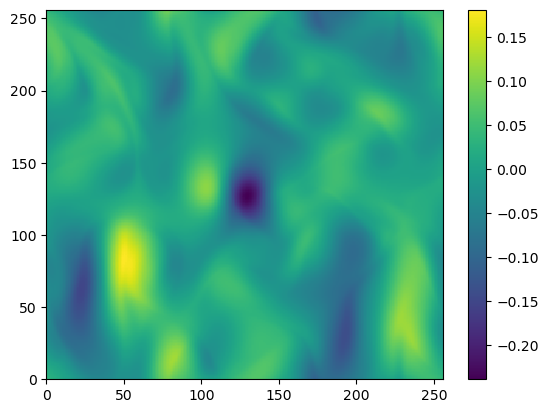

In [32]:
plt.pcolormesh(contents['u'])
plt.colorbar()

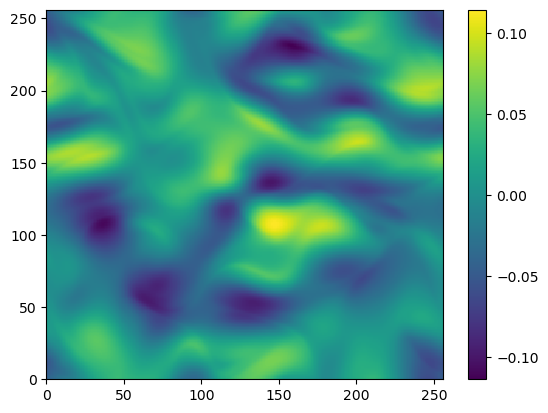

In [26]:
plt.pcolormesh(u['g'][1])
plt.colorbar()

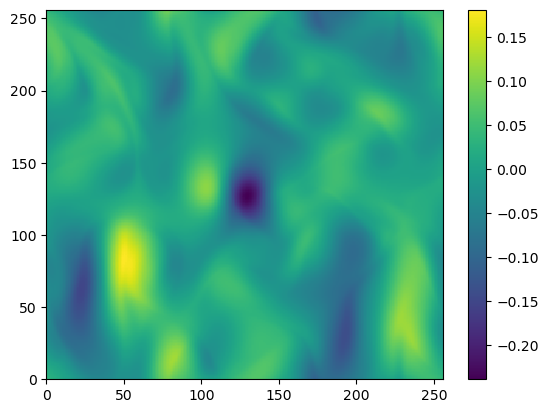

In [17]:
plt.pcolormesh(u['g'][0])
plt.colorbar()
